# Capstone Project

## Part 3

### Task 1 - Build a draft version of an API with train, predict, and logfile endpoints.

App.py includes end points for:
- Train
- Predict
- Log file

In addtion, test cases are provided in the UnitTests folder

### Task 2 - Using Docker, bundle your API, model, and unit tests.

Done

### Task 3 - Using test-driven development iterate on your API in a way that anticipates scale, load, and drift.

Done (but could use guidance on what exactly is expected!)

### Task 4 - Create a post-production analysis script that investigates the relationship between model performance and the business metric.

Python script created: post_prod_analysis.py
    

### Task 5 - Articulate your summarized findings in a final report.

In [117]:
import os
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [34]:

IMAGE_DIR = os.path.join("..","images")

In [25]:
df = pd.read_csv(os.path.join('..','production_analysis.csv'))

In [122]:
as_dates = pd.to_datetime(df.date)
df.date = as_dates

In [111]:
df_melted = df.melt(id_vars=['country','date'], var_name='type', value_vars=['target', 'predicted'])


In [112]:
df_melted.date[0]

Timestamp('2019-08-07 00:00:00')

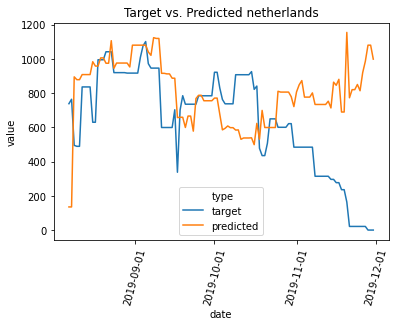

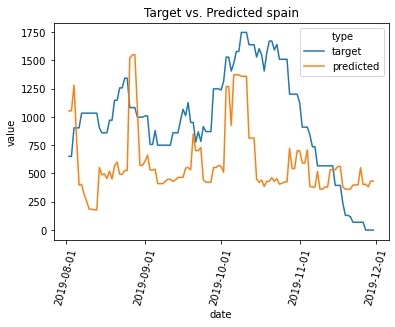

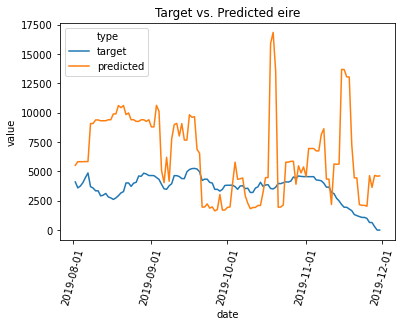

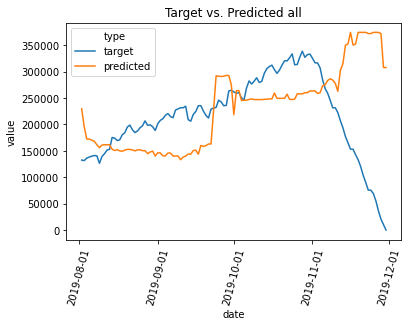

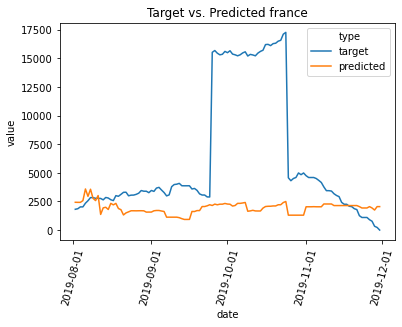

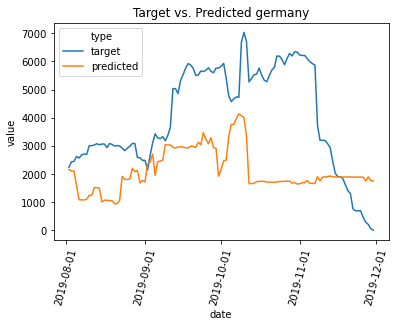

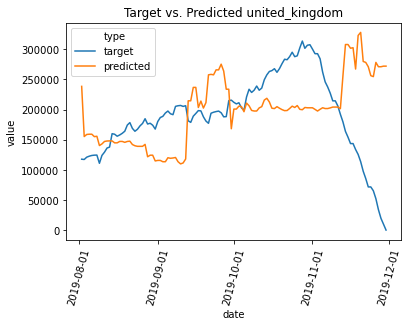

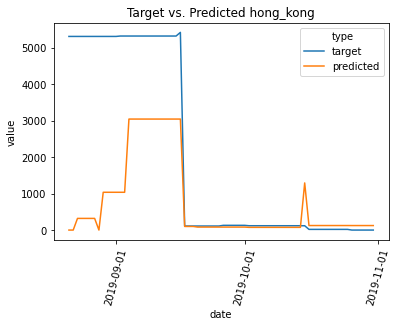

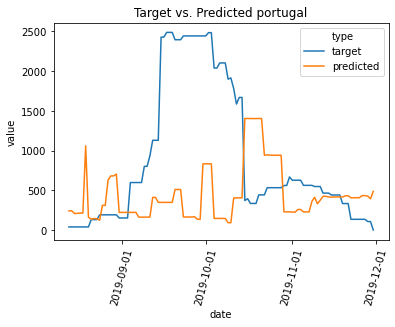

In [124]:
for country in df_melted.country.unique():
    plt.clf()
    df_graph = df_melted[df_melted.country == country]

    f = sns.lineplot(data=df_graph, y='value', x='date', hue='type')

    f.set_xticklabels(labels=df_graph.date,rotation=75)
    f.xaxis.set_major_locator(MonthLocator())
    f.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    
    
    image_path = os.path.join(IMAGE_DIR, "PostProd_Analysis_" + country + ".png")
    
    
    
    f.set_title("Target vs. Predicted " + country)
    f.get_figure().savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)
    plt.show()


/home/matthew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


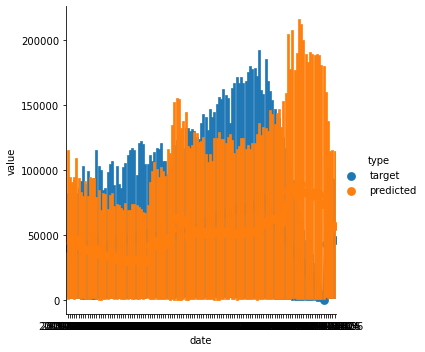

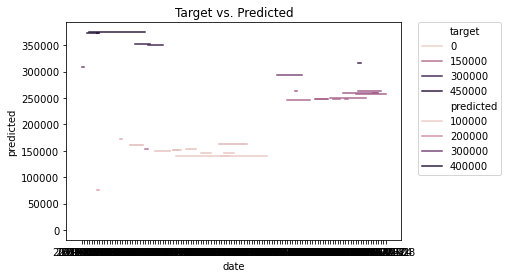